In [70]:
import pandas as pd
import numpy as np

variables = ["Debris", "Magma", "q_liq"]
channels = ["Ch0", "Ch1", "Ch2", "Ch3"]

def read_first_run():

    txt_files = ["./debris/CHANNEL1/CHANNEL1_DEBRIS_1.txt", 
                 "./debris/CHANNEL2/CHANNEL2_DEBRIS_1.txt", 
                 "./debris/CHANNEL3/CHANNEL3_DEBRIS_1.txt", 
                 "./debris/DOWNCOMER/Downcomer_DEBRIS_1.txt",
                 "./magma/CHANNEL1/CHANNEL1_MAGMA_1.txt", 
                 "./magma/CHANNEL2/CHANNEL2_MAGMA_1.txt", 
                 "./magma/CHANNEL3/CHANNEL3_MAGMA_1.txt", 
                 "./magma/DOWNCOMER/Downcomer_MAGMA_1.txt",
                 "./flowrates/CHANNEL_1/CHANNEL1_flowrate_1.txt", 
                 "./flowrates/CHANNEL_2/CHANNEL2_flowrate_1.txt", 
                 "./flowrates/CHANNEL_3/CHANNEL3_flowrate_1.txt", 
                 "./flowrates/Downcomer/Downcomer_flowrate_1.txt"]

    file_index = 0
    data = pd.DataFrame()

    for f in txt_files:
    
        print('Location:', f)
        print('File Name:', f.split("\\")[-1])
    
        df = pd.read_csv(f, sep=' ')
        
        if file_index > 0:
            df = df.drop('TIME', axis=1)
    
        display(df)
    
        data = pd.concat([data, df], axis='columns')
    
        file_index += 1
        
    return data

filenames = ["./debris/CHANNEL1/CHANNEL1_DEBRIS_x.txt", 
             "./debris/CHANNEL2/CHANNEL2_DEBRIS_x.txt", 
             "./debris/CHANNEL3/CHANNEL3_DEBRIS_x.txt", 
             "./debris/DOWNCOMER/Downcomer_DEBRIS_x.txt",
             "./magma/CHANNEL1/CHANNEL1_MAGMA_x.txt", 
             "./magma/CHANNEL2/CHANNEL2_MAGMA_x.txt", 
             "./magma/CHANNEL3/CHANNEL3_MAGMA_x.txt", 
             "./magma/DOWNCOMER/Downcomer_MAGMA_x.txt",
             "./flowrates/CHANNEL_1/CHANNEL1_flowrate_x.txt", 
             "./flowrates/CHANNEL_2/CHANNEL2_flowrate_x.txt", 
             "./flowrates/CHANNEL_3/CHANNEL3_flowrate_x.txt", 
             "./flowrates/Downcomer/Downcomer_flowrate_x.txt"]

def read_run(run):
    
    filenames = ["./debris/CHANNEL1/CHANNEL1_DEBRIS_x.txt", 
                 "./debris/CHANNEL2/CHANNEL2_DEBRIS_x.txt", 
                 "./debris/CHANNEL3/CHANNEL3_DEBRIS_x.txt", 
                 "./debris/DOWNCOMER/Downcomer_DEBRIS_x.txt",
                 "./magma/CHANNEL1/CHANNEL1_MAGMA_x.txt", 
                 "./magma/CHANNEL2/CHANNEL2_MAGMA_x.txt", 
                 "./magma/CHANNEL3/CHANNEL3_MAGMA_x.txt", 
                 "./magma/DOWNCOMER/Downcomer_MAGMA_x.txt",
                 "./flowrates/CHANNEL_1/CHANNEL1_flowrate_x.txt", 
                 "./flowrates/CHANNEL_2/CHANNEL2_flowrate_x.txt", 
                 "./flowrates/CHANNEL_3/CHANNEL3_flowrate_x.txt", 
                 "./flowrates/Downcomer/Downcomer_flowrate_x.txt"]
    
    for i in range(0,len(filenames)):  
         filenames[i] = filenames[i].replace("x.txt", "%d.txt" % run)
                   
    file_index = 0
    data = pd.DataFrame()

    for f in filenames:    
  
        df = pd.read_csv(f, sep=' ')
        
        if file_index > 0:
            df = df.drop('TIME', axis=1)
    
        data = pd.concat([data, df], axis='columns')
    
        file_index += 1
        
    return data

def read_all_runs(runs=300):
    
    dataframe_list = []
    
    for i in range(1,runs):
        dataframe_list.append(read_run(i))
        
    return dataframe_list

def plot_channel(data, variable, channel):
    
    nrows=4
    ncols=4

    fig, axes = plt.subplots(nrows, ncols, sharex=True, figsize=(18,18))

    fig.suptitle('variable: %s, channel: %s' % (variable, channel), fontsize=20)

    counter = 1
    for i in range(0, nrows):
        for ii in range(0, ncols):
            name = "%s_%s_mesh%d" % (variable, channel, counter)
            if counter < 16: data.plot(x=['TIME'], y=[name], kind="scatter", ax=axes[i, ii])
            counter += 1

    plt.show()

In [58]:
data = read_run(1)
display(data)

,TIME,Debris_Ch1_mesh1,Debris_Ch1_mesh2,Debris_Ch1_mesh3,Debris_Ch1_mesh4,Debris_Ch1_mesh5,Debris_Ch1_mesh6,Debris_Ch1_mesh7,Debris_Ch1_mesh8,Debris_Ch1_mesh9,...,q_liq_Ch0_mesh7,q_liq_Ch0_mesh8,q_liq_Ch0_mesh9,q_liq_Ch0_mesh10,q_liq_Ch0_mesh11,q_liq_Ch0_mesh12,q_liq_Ch0_mesh13,q_liq_Ch0_mesh14,q_liq_Ch0_mesh15,Unnamed: 16
0,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-19371.687007,-19371.687007,-19371.687007,-19371.687007,-19371.687007,-19371.687007,-19371.687007,-19371.687006,-19371.687006,NaN
1,50.000400,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-1616.795081,-1610.703619,-1604.378812,-1597.810249,-1590.987113,-1583.898827,-1576.534466,-1568.881803,-1560.926523,NaN
2,100.000400,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,518.830933,520.220241,521.472580,522.569140,523.505312,524.275503,524.935893,525.361084,526.150099,NaN
3,150.240503,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,89.972202,90.263620,90.624112,91.009093,91.412601,91.783915,92.219720,92.555748,92.960248,NaN
4,200.420039,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,299.766999,303.429211,306.417373,309.084764,311.017006,313.498097,313.928974,317.934949,314.295773,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,23390.451436,0.0,2.041331e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.025939,...,0.009086,0.010311,0.009463,0.007534,0.003082,0.003059,0.003064,0.003078,0.003112,NaN
268,24290.451436,0.0,2.095178e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.025794,...,0.020580,0.024321,0.026168,0.018799,0.004142,0.004118,0.004085,0.004045,0.003995,NaN
269,25190.451436,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.025733,...,0.025950,0.030960,0.033282,0.024003,0.005780,0.005736,0.005682,0.005622,0.005551,NaN
270,26090.451436,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.025701,...,0.029883,0.035540,0.037698,0.027278,0.008502,0.008450,0.008406,0.008371,0.008346,NaN


In [62]:
data = read_all_runs()
display(data[0])

,TIME,Debris_Ch1_mesh1,Debris_Ch1_mesh2,Debris_Ch1_mesh3,Debris_Ch1_mesh4,Debris_Ch1_mesh5,Debris_Ch1_mesh6,Debris_Ch1_mesh7,Debris_Ch1_mesh8,Debris_Ch1_mesh9,...,q_liq_Ch0_mesh7,q_liq_Ch0_mesh8,q_liq_Ch0_mesh9,q_liq_Ch0_mesh10,q_liq_Ch0_mesh11,q_liq_Ch0_mesh12,q_liq_Ch0_mesh13,q_liq_Ch0_mesh14,q_liq_Ch0_mesh15,Unnamed: 16
0,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-19371.687007,-19371.687007,-19371.687007,-19371.687007,-19371.687007,-19371.687007,-19371.687007,-19371.687006,-19371.687006,NaN
1,50.000400,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-1616.795081,-1610.703619,-1604.378812,-1597.810249,-1590.987113,-1583.898827,-1576.534466,-1568.881803,-1560.926523,NaN
2,100.000400,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,518.830933,520.220241,521.472580,522.569140,523.505312,524.275503,524.935893,525.361084,526.150099,NaN
3,150.240503,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,89.972202,90.263620,90.624112,91.009093,91.412601,91.783915,92.219720,92.555748,92.960248,NaN
4,200.420039,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,299.766999,303.429211,306.417373,309.084764,311.017006,313.498097,313.928974,317.934949,314.295773,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,23390.451436,0.0,2.041331e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.025939,...,0.009086,0.010311,0.009463,0.007534,0.003082,0.003059,0.003064,0.003078,0.003112,NaN
268,24290.451436,0.0,2.095178e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.025794,...,0.020580,0.024321,0.026168,0.018799,0.004142,0.004118,0.004085,0.004045,0.003995,NaN
269,25190.451436,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.025733,...,0.025950,0.030960,0.033282,0.024003,0.005780,0.005736,0.005682,0.005622,0.005551,NaN
270,26090.451436,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.025701,...,0.029883,0.035540,0.037698,0.027278,0.008502,0.008450,0.008406,0.008371,0.008346,NaN


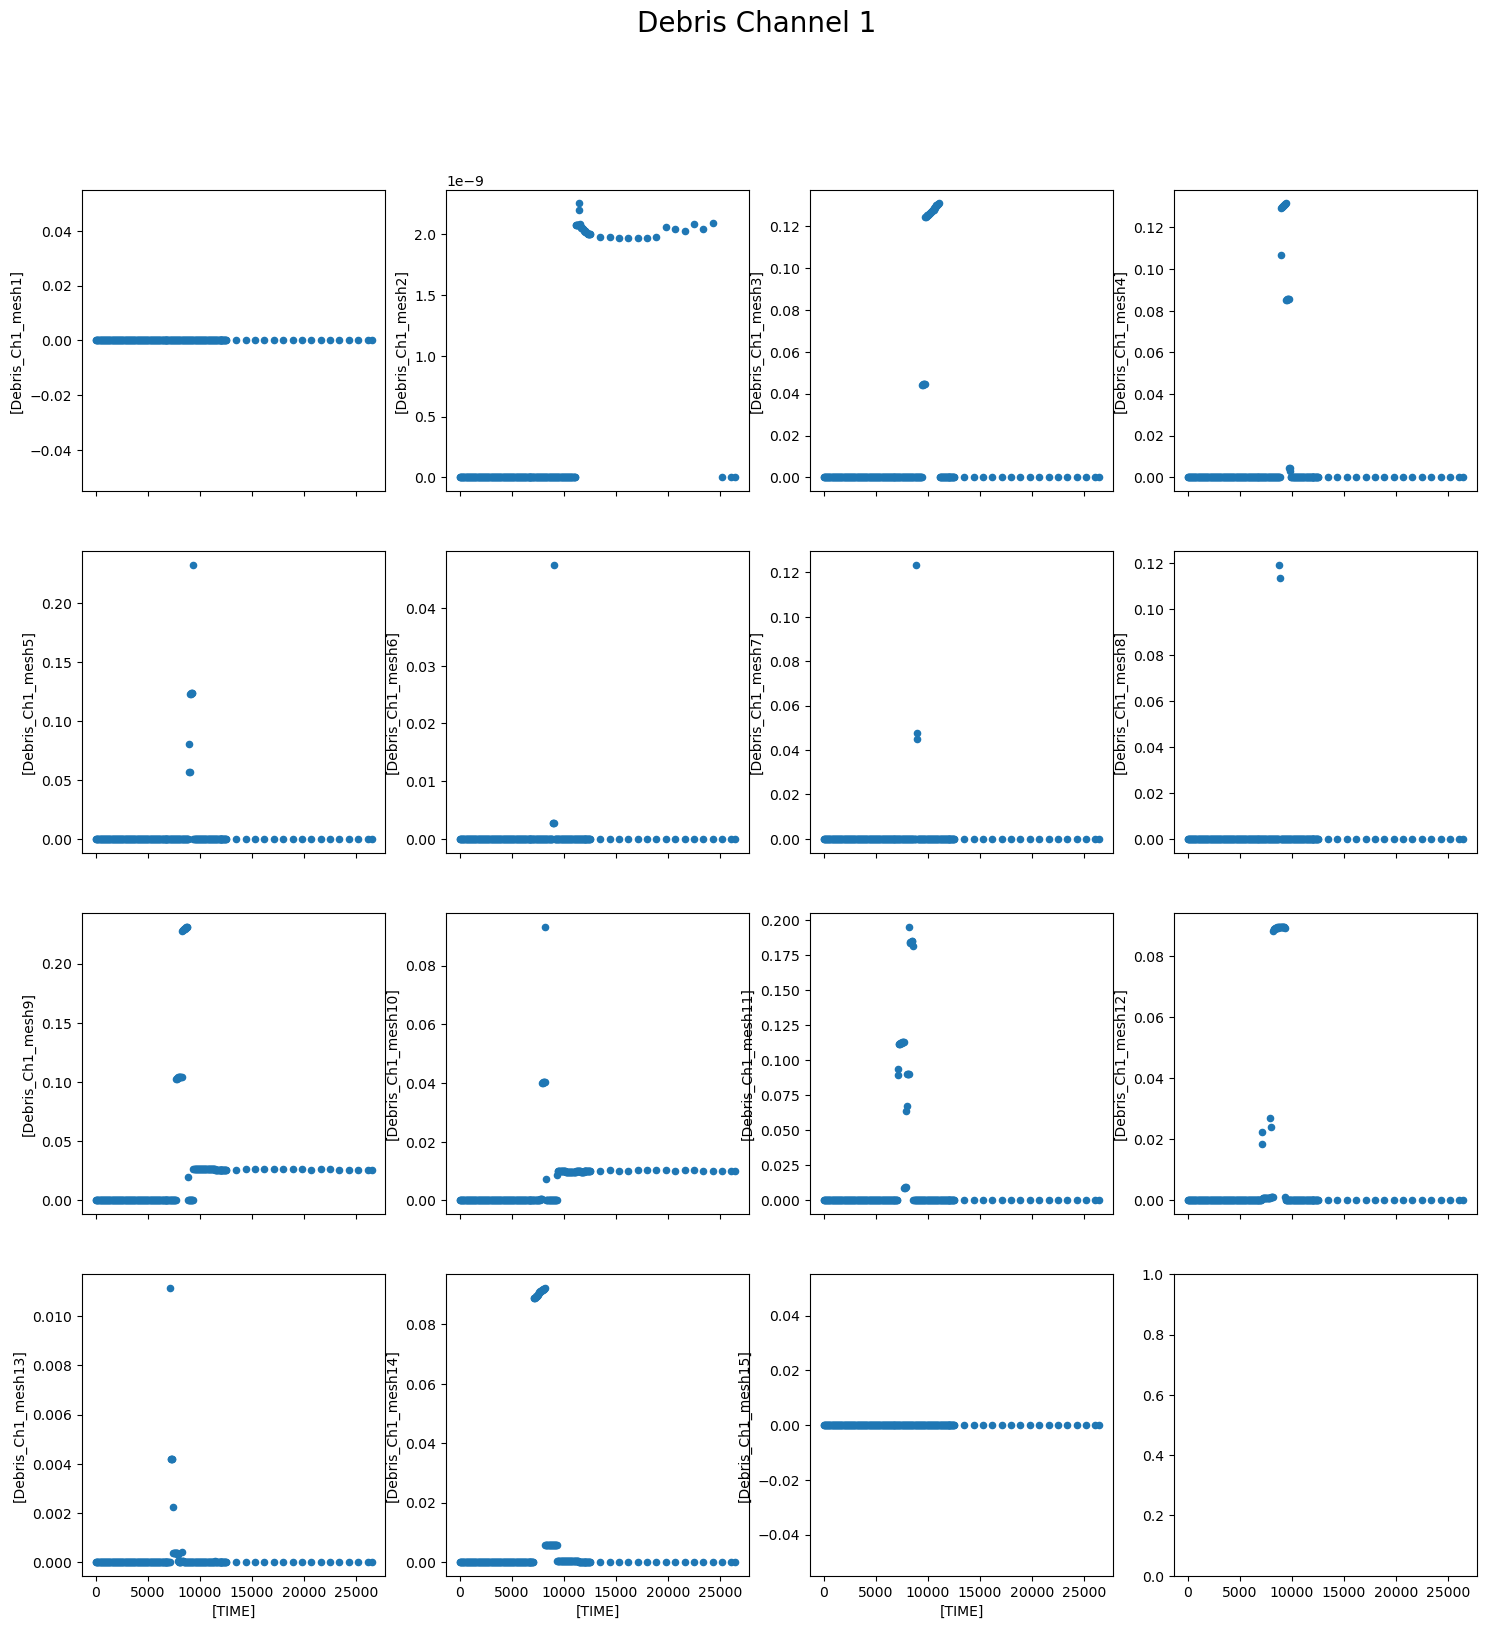

In [27]:
import matplotlib.pyplot as plt
import numpy as np

nrows=4
ncols=4

fig, axes = plt.subplots(nrows, ncols, sharex=True, figsize=(18,18))
counter = 1

fig.suptitle('Debris Channel 1', fontsize=20)

for i in range(0, nrows):
    for ii in range(0, ncols):
        name = "Debris_Ch1_mesh%d" % (counter)
        if counter < 16: data.plot(x=['TIME'], y=[name], kind="scatter", ax=axes[i, ii])
        counter += 1

plt.show()

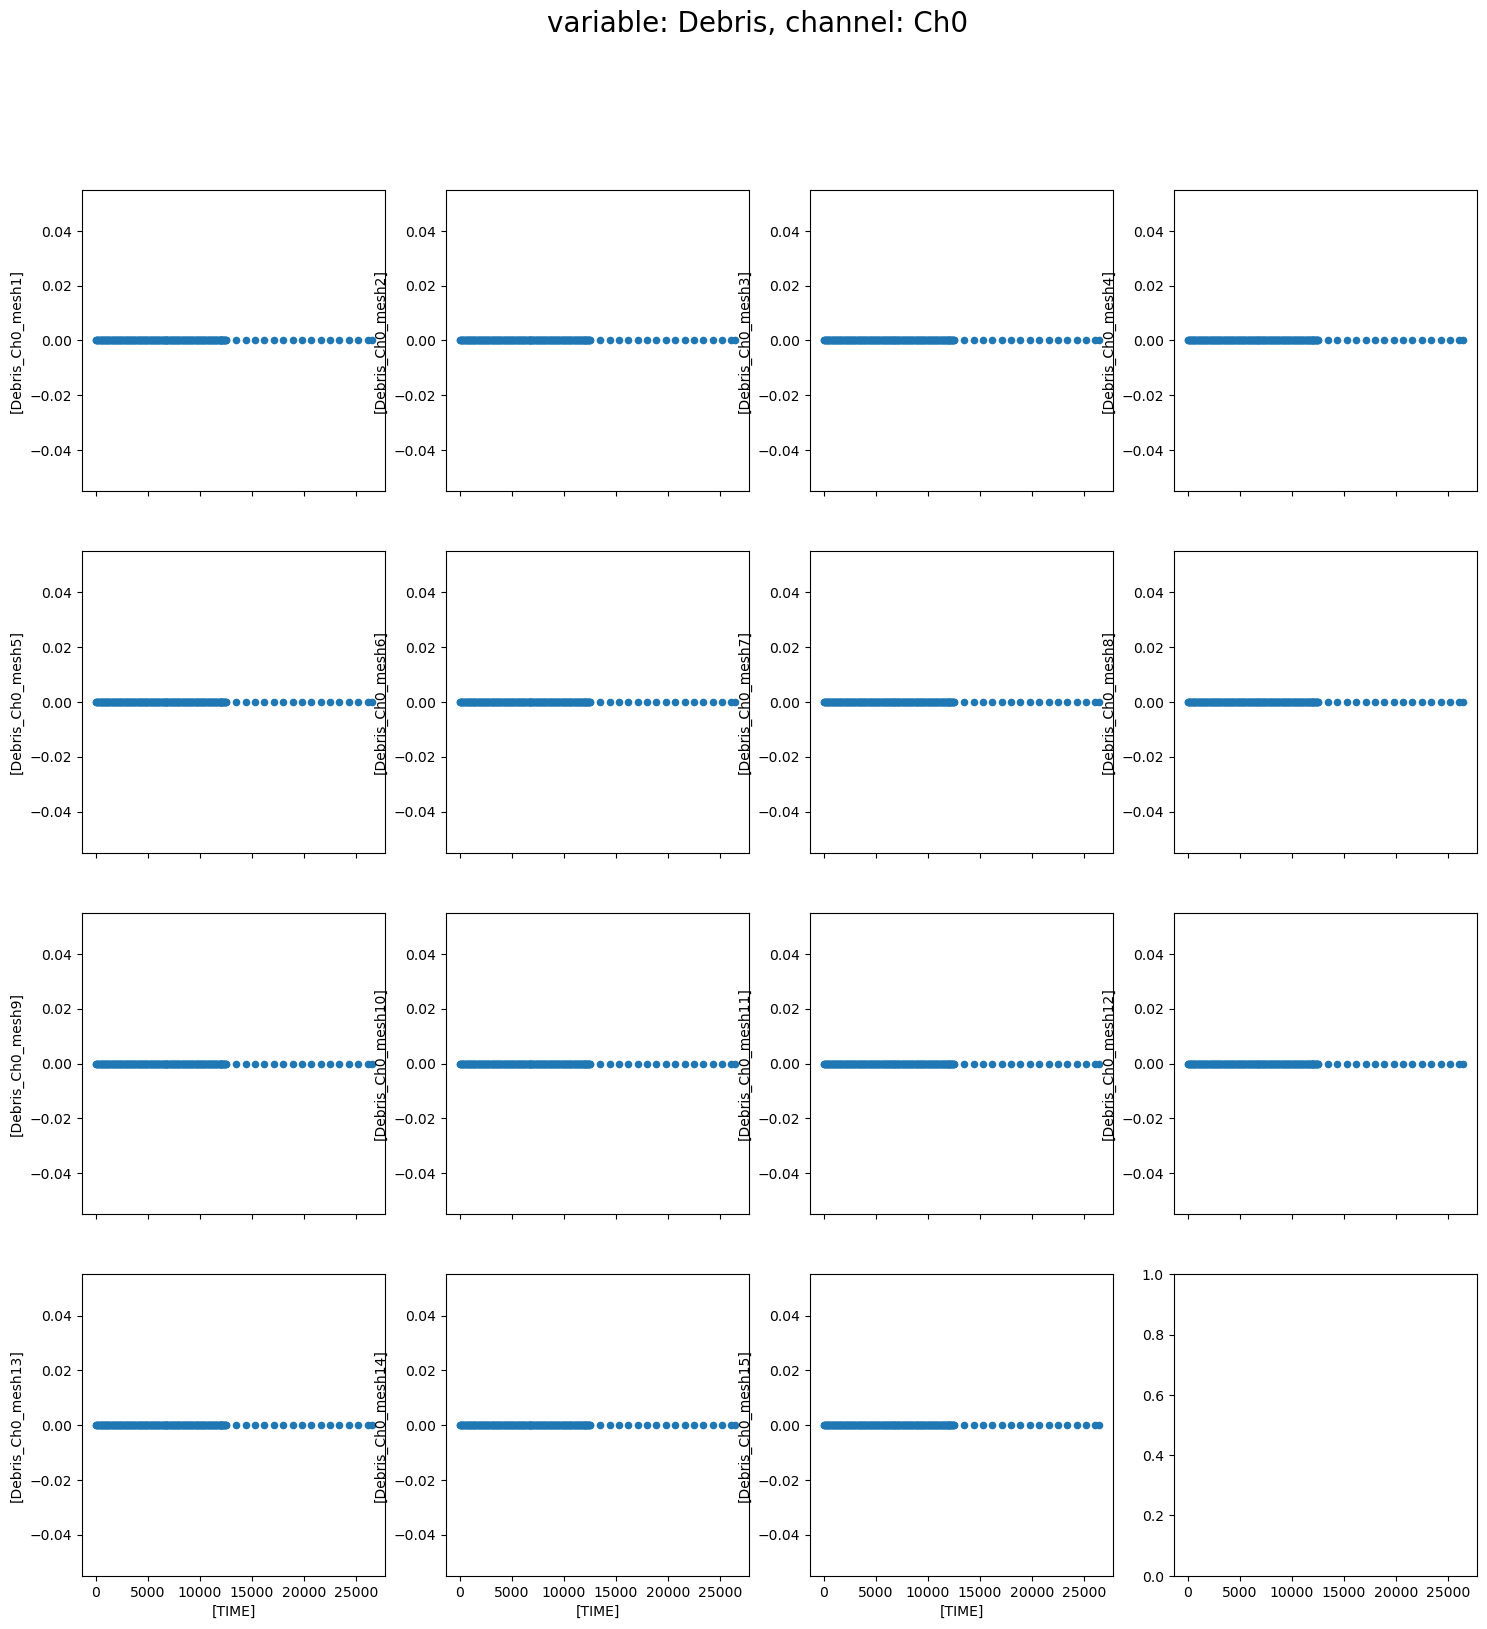

In [71]:
plot_channel(data[0], variables[0], channels[0])

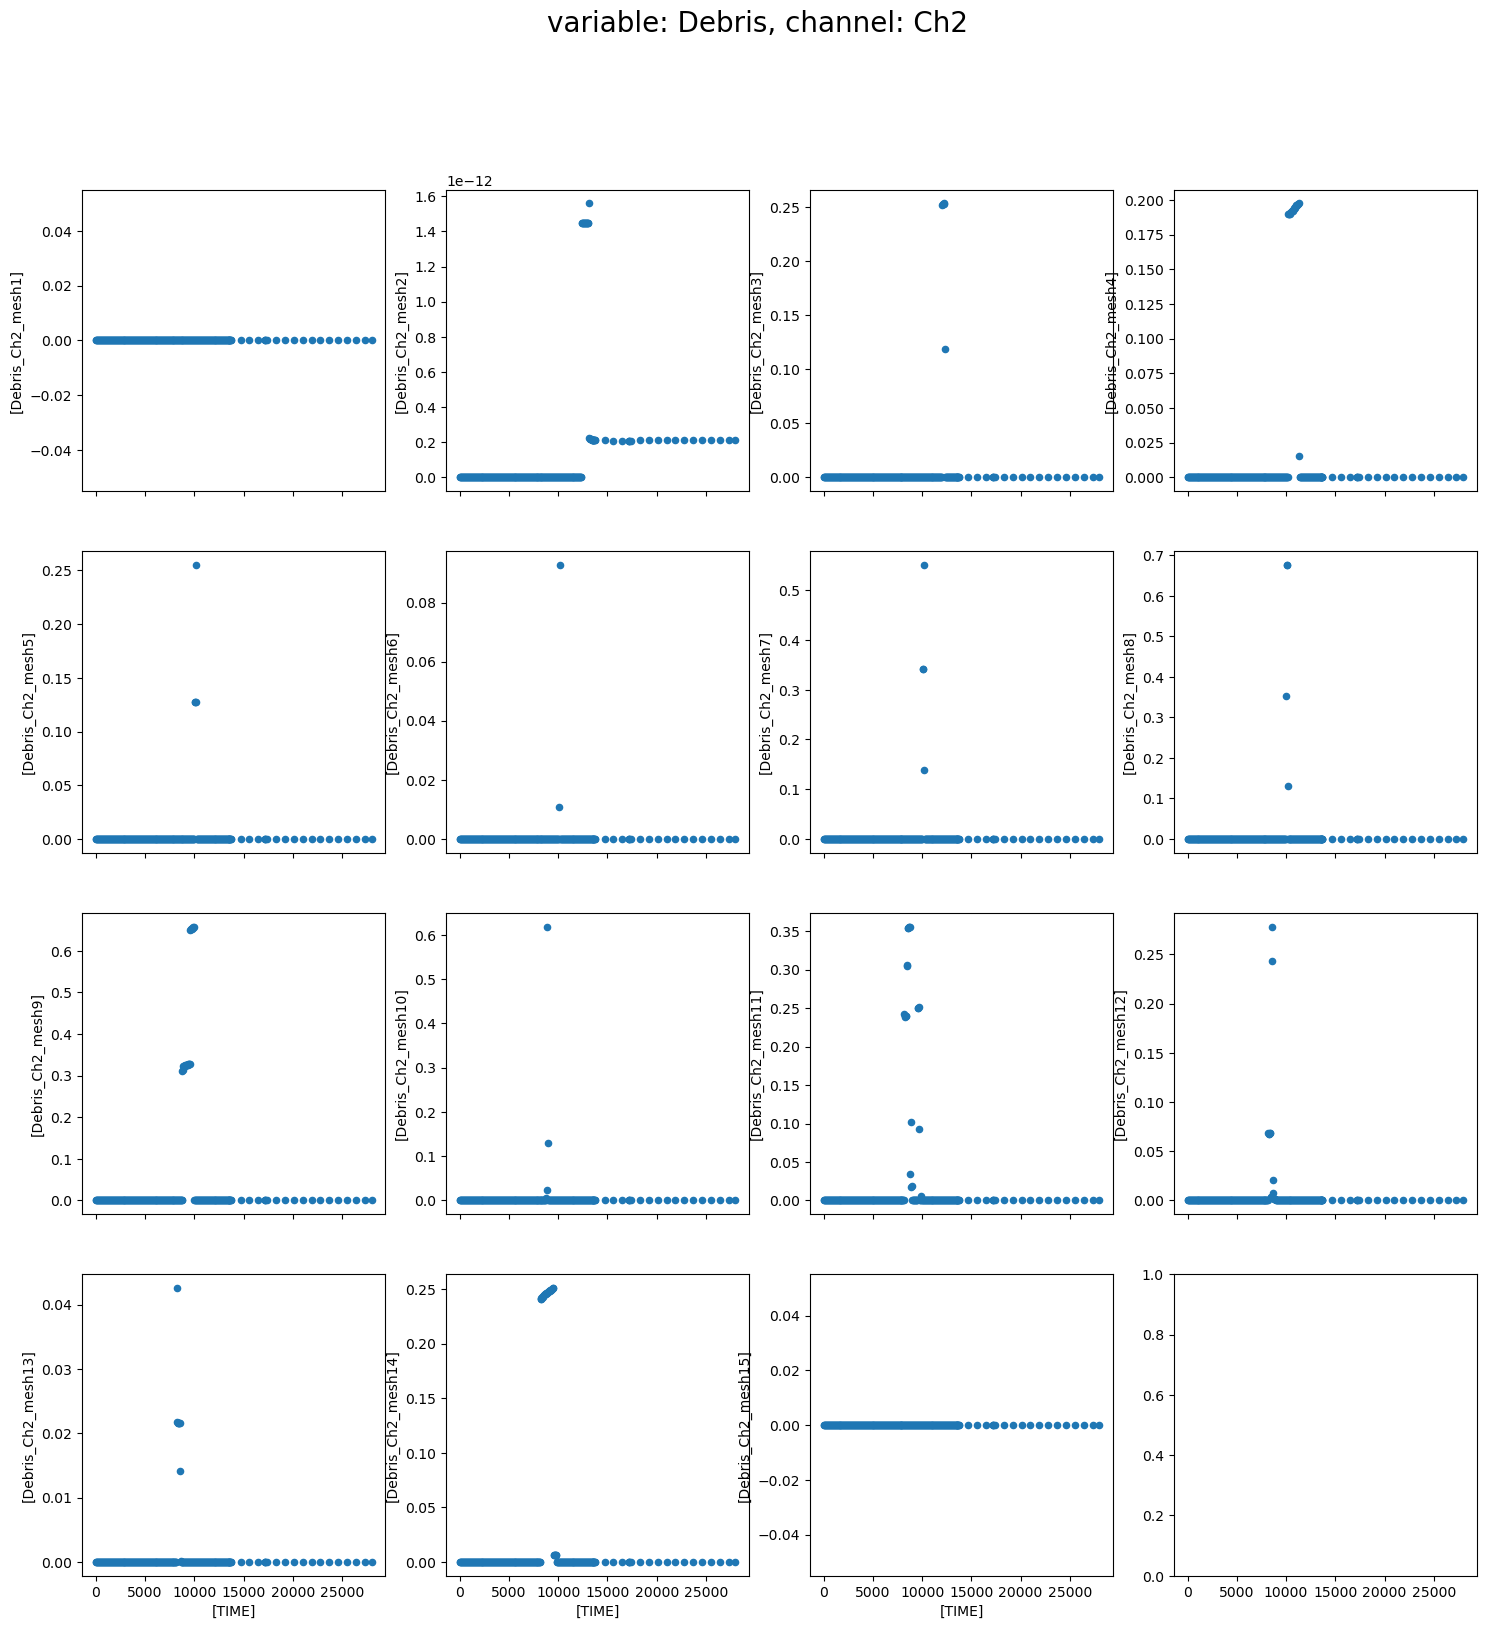

In [67]:
plot_channel(data[5], "Debris", "Ch2")